# Exploratory data analysis on Titanic Dataset.



---



## 1. Importing the required libraries for EDA

Below are the libraries that are used in order to perform EDA (Exploratory data analysis) in this tutorial.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)



---



## 2. Loading the data into the data frame.

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/titanic-dataset


In [4]:
df = pd.read_csv(path + "/Titanic-Dataset.csv")
# To display the top 5 rows
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail(5)                        # To display the botton 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q




---



## 3. Checking the types of data

In [6]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64




---



## 4. Dropping irrelevant columns

This step is certainly needed in every EDA because sometimes there would be many columns that we never use in such cases dropping is the only solution. In this case, the columns such as Engine Fuel Type, Market Category, Vehicle style, Popularity, Number of doors, Vehicle Size doesn't make any sense to me so I just dropped for this instance.

In [7]:
df = df.drop(['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis=1)
df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,male,22.0,7.2500
1,2,1,1,female,38.0,71.2833
2,3,1,3,female,26.0,7.9250
3,4,1,1,female,35.0,53.1000
4,5,0,3,male,35.0,8.0500




---



## 5. Renaming the columns

In this instance, most of the column names are very confusing to read, so I just tweaked their column names. This is a good approach it improves the readability of the data set.

In [8]:
df = df.rename(columns={"Pclass": "Ticket Class"})
df.head(5)

,PassengerId,Survived,Ticket Class,Sex,Age,Fare
0,1,0,3,male,22.0,7.2500
1,2,1,1,female,38.0,71.2833
2,3,1,3,female,26.0,7.9250
3,4,1,1,female,35.0,53.1000
4,5,0,3,male,35.0,8.0500




---



## 6. Dropping the duplicate rows

In [15]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 6)


In [19]:
df = df.drop_duplicates()
df.head(5)

,PassengerId,Survived,Ticket Class,Sex,Age,Fare
0,1,0,3,male,22.0,7.2500
1,2,1,1,female,38.0,71.2833
2,3,1,3,female,26.0,7.9250
3,4,1,1,female,35.0,53.1000
4,5,0,3,male,35.0,8.0500


In [20]:
df.count()

,0
PassengerId,891
Survived,891
Ticket Class,891
Sex,891
Age,714
Fare,891




---



## 7. Dropping the missing or null values.

In [21]:
print(df.isnull().sum())

PassengerId       0
Survived          0
Ticket Class      0
Sex               0
Age             177
Fare              0
dtype: int64


Since only age has N/A values, and only analysis on Age might effect so not dropping it.



---



## 8. Detecting Outliers

<Axes: xlabel='Fare'>

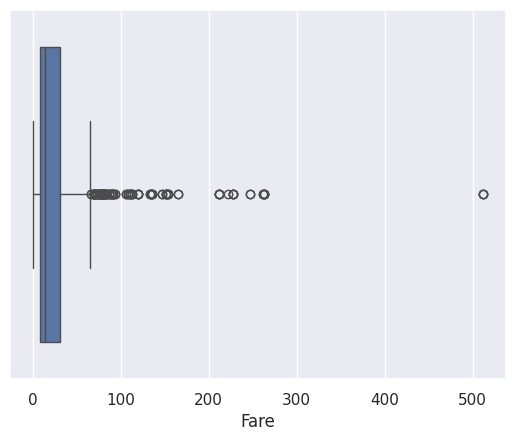

In [27]:
sns.boxplot(x=df['Fare'])

<Axes: xlabel='HP'>

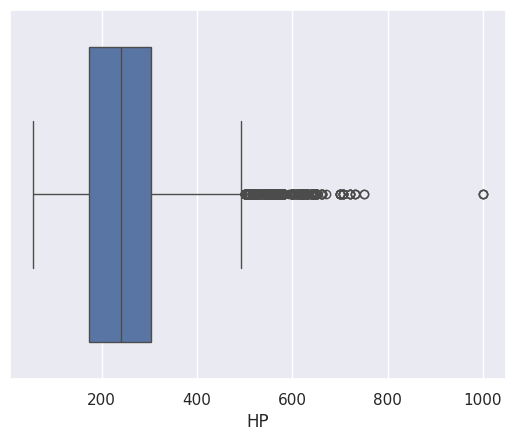

In [ ]:
sns.boxplot(x=df['HP'])

There are outliers in fare and age but this can be crucial data in our analysis



---



## 9. Plot different features against one another (scatter), against frequency (histogram)

### Histogram

Histogram refers to the frequency of occurrence of variables in an interval.

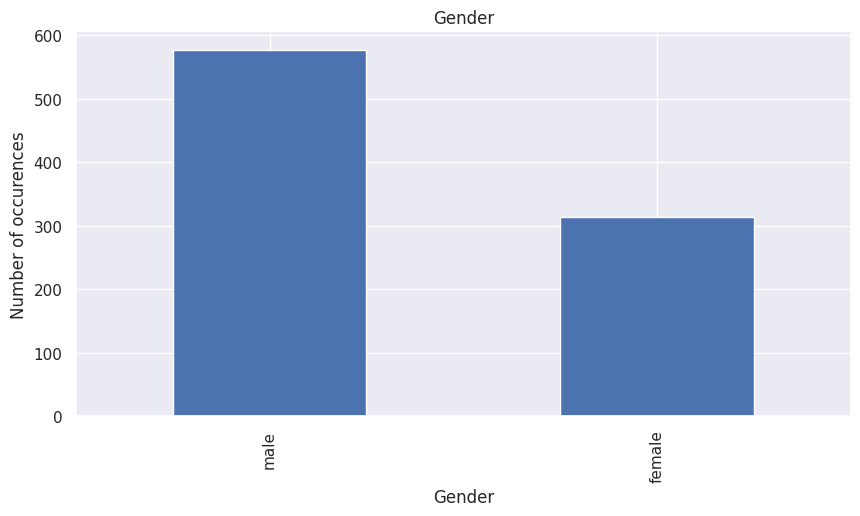

In [30]:
df["Sex"].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Gender")
plt.ylabel('Number of occurences')
plt.xlabel('Gender');

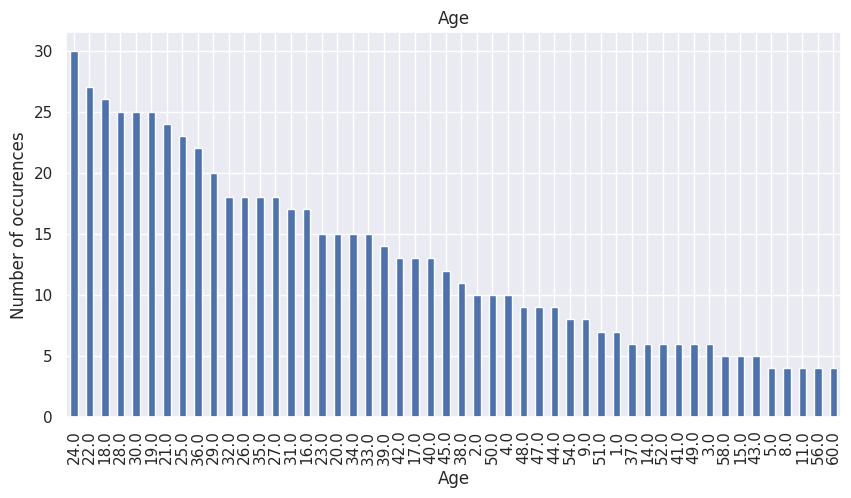

In [34]:
df["Age"].value_counts().nlargest(50).plot(kind='bar', figsize=(10,5))
plt.title("Age")
plt.ylabel('Number of occurences')
plt.xlabel('Age');

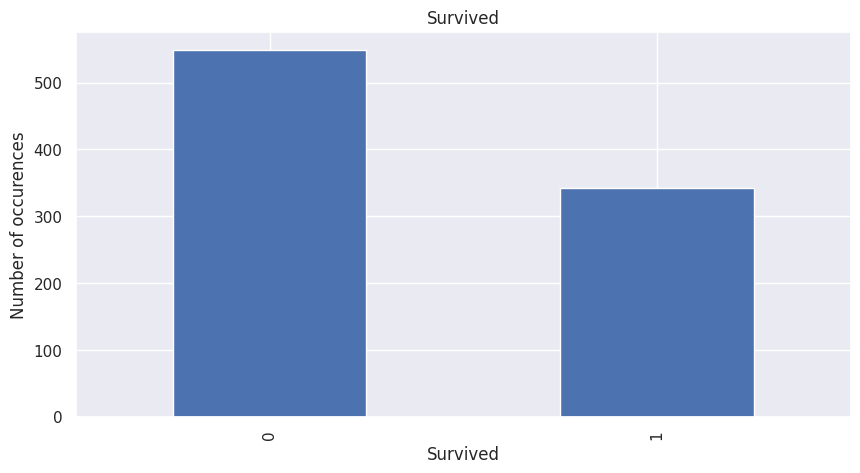

In [36]:
df["Survived"].value_counts().nlargest(50).plot(kind='bar', figsize=(10,5))
plt.title("Survived")
plt.ylabel('Number of occurences')
plt.xlabel('Survived');

Text(0.5, 1.0, 'Survival Count by Sex')

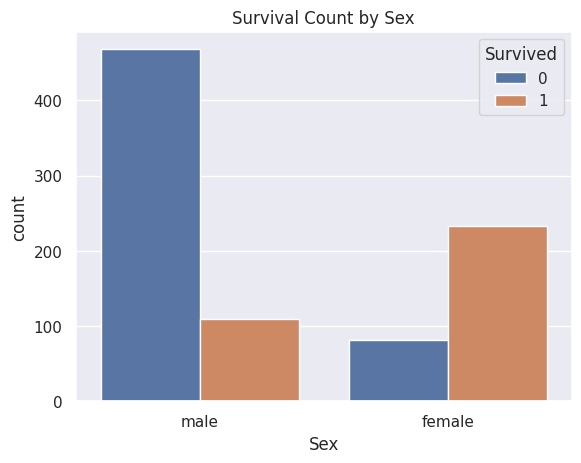

In [40]:
sns.countplot(data=df, x="Sex", hue="Survived")
plt.title("Survival Count by Sex")

### Heat Maps

Heat Maps is a type of plot which is necessary when we need to find the dependent variables. One of the best way to find the relationship between the features can be done using heat maps.

,PassengerId,Survived,Ticket Class,Age,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,0.257307
Ticket Class,-0.035144,-0.338481,1.000000,-0.369226,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,0.096067
Fare,0.012658,0.257307,-0.549500,0.096067,1.000000


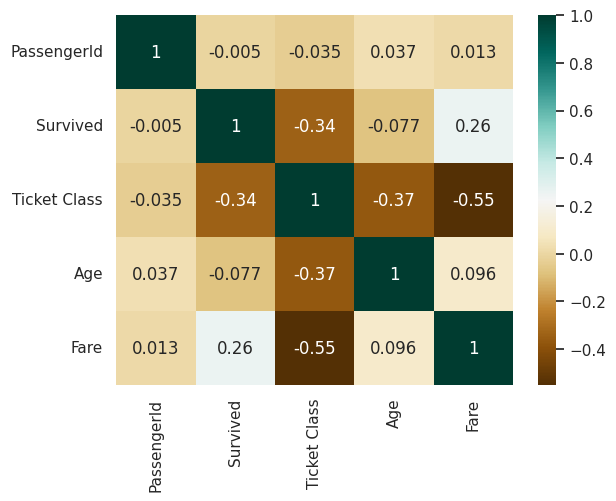

In [41]:
numeric_df = df.select_dtypes(include=np.number) # Select only numeric columns
c = numeric_df.corr() # Calculate correlation on numeric columns
sns.heatmap(c,cmap="BrBG",annot=True)
c

<Axes: xlabel='Survived', ylabel='Fare'>

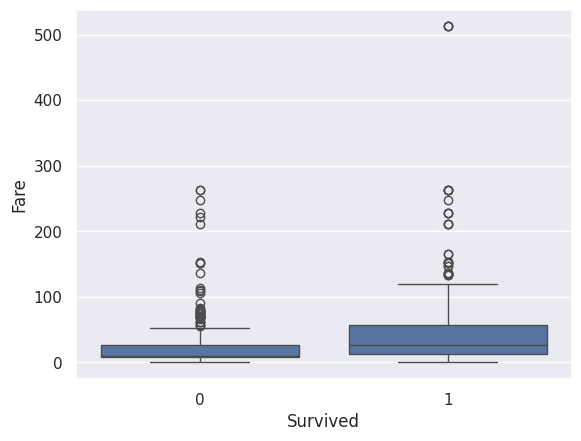

In [42]:
import seaborn as sns
sns.boxplot(data=df, x='Survived', y='Fare')


### Scatterplot

We generally use scatter plots to find the correlation between two variables.

Text(0.5, 1.0, 'Fare vs Age by Survival')

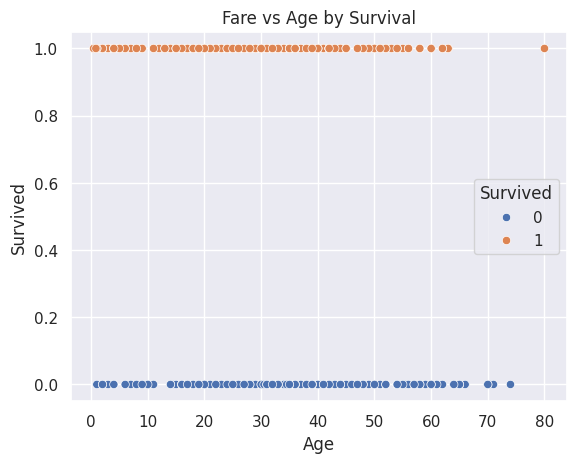

In [53]:
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived')
plt.title('Fare vs Age by Survival')


Text(0.5, 1.0, 'Fare Distribution by Ticket Class')

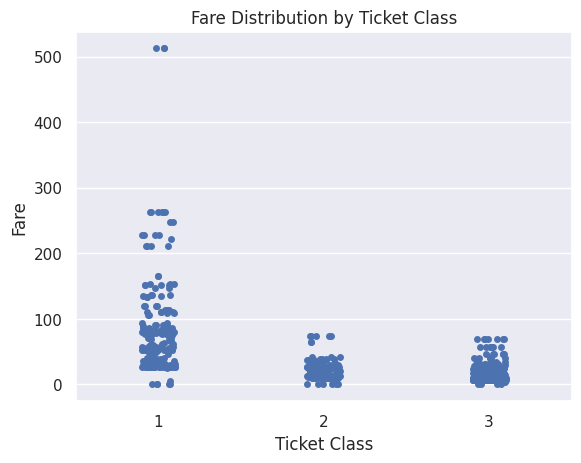

In [52]:
sns.stripplot(data=df, x='Ticket Class', y='Fare', jitter=True)
plt.title('Fare Distribution by Ticket Class')
